In [ ]:
!pip install hazm==0.7.0
!pip install numpy==1.23.5

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from hazm import *
from matplotlib import pyplot as plt
import tensorflow as tf


In [9]:
labelled_data_path = "/content/drive/MyDrive/Colab Notebooks/NLP/Cafe_Bazar/Codes /data_labelled.csv"
unlabelled_data_path = "/content/drive/MyDrive/Colab Notebooks/NLP/Cafe_Bazar/Codes /data_unlabelled.csv"

In [10]:
labelled_df = pd.read_csv(labelled_data_path, index_col=0)
print(labelled_df.shape)
labelled_df.head()

(3596, 3)


,text,label,comment_len
id,,,
131244574,عالی عالی عالی عالی عالی عالی عالی عالی عالی ع...,0,27
133141894,دوستان این نظرات و پیشنهادات رو باید به پشتیبا...,0,24
94129372,خیلی ایراد داره مسخره تر از این نمیشه رقیب‌هات...,1,25
131334220,نه کی گفته خرابه من دارم باهاش کار میکنم از من...,0,20
131387172,سلام عالیه حتما نصب کنید از کالاف دیوتی هم بهتره,0,10


# EDA

#### Labels distribution

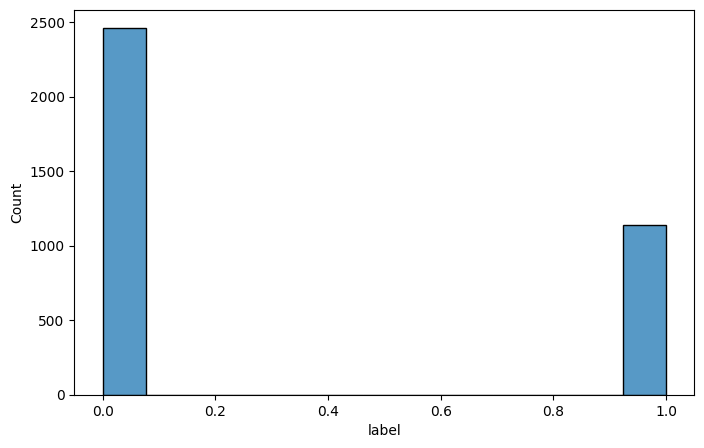

In [ ]:
plt.figure(figsize=(8, 5))
_ = sns.histplot(labelled_df.label)

#### Comments length distribution

In [ ]:
labelled_comment_lens = [len(x.split(' ')) for x in labelled_df.text]
print(f'First Quantile : {np.percentile(labelled_comment_lens, 25)}')
print(f'Second/Median Quantile : {np.percentile(labelled_comment_lens, 50)}')
print(f'Third Quantile : {np.percentile(labelled_comment_lens, 75)}')

First Quantile : 8.0
Second/Median Quantile : 13.0
Third Quantile : 21.0


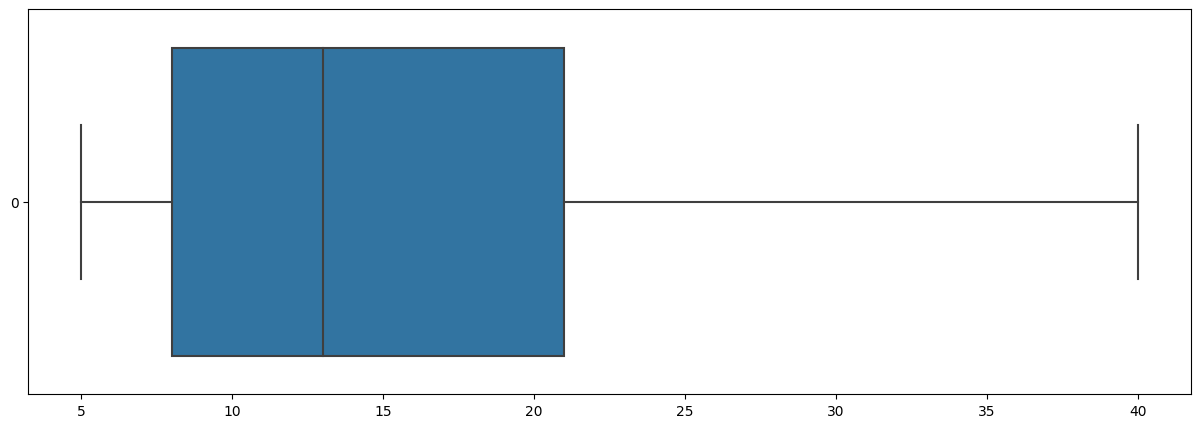

In [ ]:
plt.figure(figsize=(15, 5))
_ = sns.boxplot(labelled_comment_lens, orient='h')

#### Comments length distribution based on labels

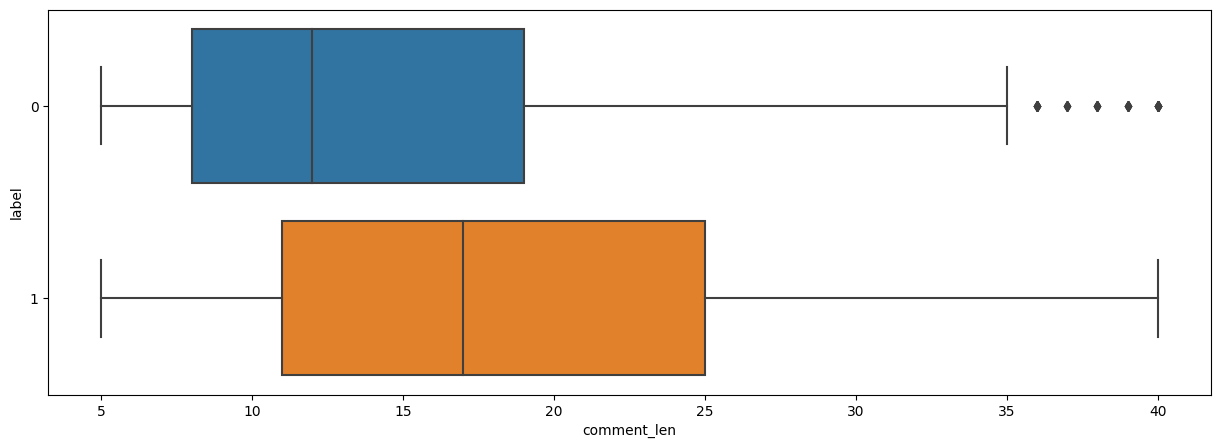

In [ ]:
plt.figure(figsize=(15, 5))
labelled_df['comment_len'] = labelled_comment_lens
_ = sns.boxplot(data=labelled_df, x="comment_len", y="label", orient='h')

#### Count of each words in comments|

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(labelled_df.text)
tokenizer.num_words

In [ ]:
words_count_ds = pd.DataFrame(columns=['words', 'word_count'])
words_count_ds['words'], words_count_ds['word_count']  = list(tokenizer.word_docs.keys()), list(tokenizer.word_docs.values())
words_count_ds = words_count_ds.sort_values('word_count', ascending=False)

Text(0.5, 1.0, 'words with the most occurrence')

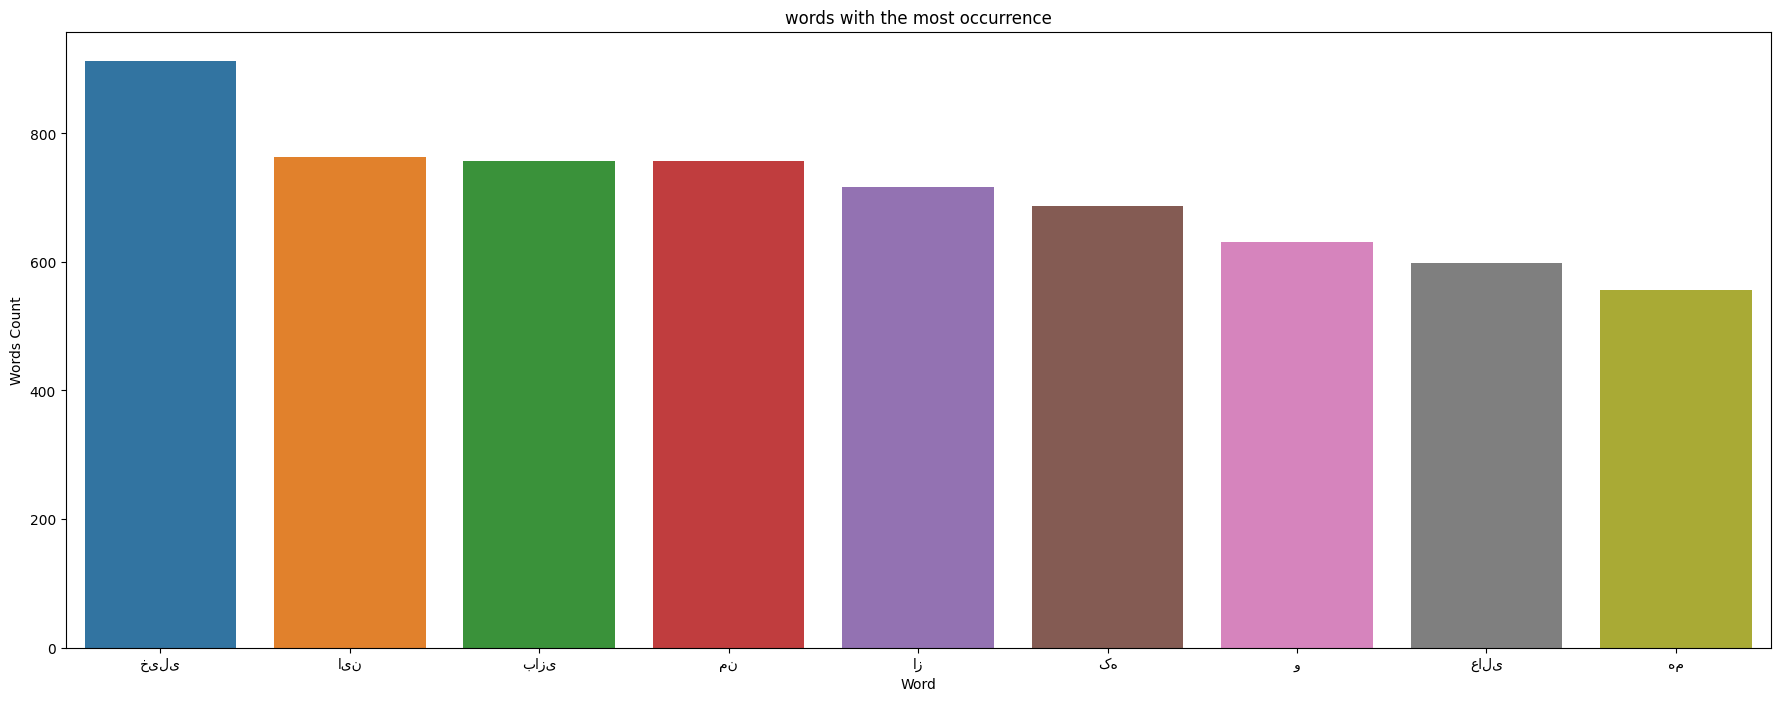

In [ ]:
_ =  plt.figure(figsize=(22, 8))
ax= plt.subplot()

_ = sns.barplot(x=words_count_ds['words'][:9], y=words_count_ds['word_count'][:9], ax=ax)  
# labels, title and ticks
ax.set_xlabel('Word')
ax.set_ylabel('Words Count')
ax.set_title('words with the most occurrence')

## Preprocessing

#### All the characters in the labeled comments

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(char_level=True)
tokenizer.fit_on_texts(np.array(labelled_df.text))
print(f"Number of Characters in all News : {len(list(tokenizer.word_index.keys()))}")
tokenizer.word_index.keys()

Number of Characters in all News : 366


dict_keys([' ', 'ا', 'ی', 'ن', 'م', 'ه', 'ر', 'د', 'ب', 'و', 'ل', 'ت', 'ک', 'س', 'ش', 'ز', 'خ', 'ع', 'ف', 'گ', 'ق', 'ص', 'چ', 'پ', '.', 'ح', 'ج', 'ط', 'آ', 'ض', '،', 'ظ', '\u200c', '۰', 'ـ', '؟', 'ث', 'ذ', '❤', '۱', '😍', '0', '!', 'غ', '️', '😡', 'ً', '۲', '۵', '👌', '👍', 'ي', '🤮', '😠', '1', '🏻', 'e', '۳', 'a', '5', '۴', '🤩', '😘', '🙏', '😂', '🤬', 'i', '2', 'o', '😑', ')', '⭐', '♥', 's', 'ژ', 'n', 'r', 't', '🥰', 'h', '💜', '😭', '3', 'ئ', '🌟', '(', 'd', '👏', '🌹', '۶', ':', '😐', '💖', '😇', '😊', '9', '✷', 'm', '4', '😔', '😒', '😙', 'l', '💙', '۸', 'g', '8', '🤢', 'p', '★', '/', '😕', '🤣', '۹', '😣', '😎', '😤', '🙄', 'ہ', '😈', '🤔', '😉', 'َ', '🦄', '💛', '۷', '😀', 'c', '😏', '6', 'y', '😫', '7', 'b', 'f', '-', '👑', '☹', '😁', 'ك', '💋', '💓', 'u', '☆', ',', 'ّ', '☺', '‿', '💗', '🧿', 'k', '✌', '🤗', '😅', '👻', '█', 'w', '😱', 'أ', '💝', 'ء', '👎', "'", '😗', 'v', '?', '✓', '💞', '🙁', '😶', '🌸', '😝', '*', '\u200d', '💔', 'ِ', '_', '🙌', '😲', '♡', '🔥', '💯', '👋', '🇮', '🇷', 'ے', '🥺', '😬', '😚', '🤘', '🙂', '😜', '#', '😩', '😦', 'z',

## Cleaning data

#### remove stopwords and lematizing

In [2]:
!git clone https://github.com/kharazi/persian-stopwords.git

Cloning into 'persian-stopwords'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 51 (delta 7), reused 5 (delta 5), pack-reused 42
Unpacking objects: 100% (51/51), 34.96 KiB | 586.00 KiB/s, done.


In [3]:
with open("/content/persian-stopwords/persian", "r") as f:
  content = f.read()
  stopwords_p = content.split("\n")
  stopwords_p = stopwords_p[:-1]        
with open("/content/persian-stopwords/short", "r") as f:
  content = f.read()
  stopwords_s = content.split("\n")
  stopwords_s = stopwords_s[:-1]

with open("/content/persian-stopwords/verbal", "r") as f:
  content = f.read()
  stopwords_v = content.split("\n")
  stopwords_v = stopwords_v[:-1]

with open("/content/persian-stopwords/nonverbal", "r") as f :
  content = f.read()
  stopwords_nv = content.split("\n")
  stopwords_nv = stopwords_nv[:-1]
  

fa_stopwords = set(stopwords_p + stopwords_s + stopwords_v + stopwords_nv)
     


In [4]:
hzm_tokenize = WordTokenizer().tokenize
hzm_lemmaitze = Lemmatizer(joined_verb_parts=False).lemmatize


def my_toknizer(text):
  text_tokens = hzm_tokenize(text)
  clean_tokens = [hzm_lemmaitze(token) for token in text_tokens if token not in fa_stopwords]
  return ' '.join(clean_tokens)

### Using predefined characters to clean the data

In [5]:
persian_alphabet = [' ', 'ا', 'ی', 'ر', 'د', 'ن', 'و', 'ه', 'م', 'ت', 'ب', 'س', 'ک', 'ش', 'ل', 'ز',
                   'خ', 'گ', 'ف', 'ق', 'پ', 'آ', 'ج', 'ع', 'ح', 'چ', 'ص', 'ط', 'غ', 'ض', 'ذ', 'ظ', 'ث', 'ژ']
persian_numbers = ['۲', '۵', '۳', '۴', '۱', '۶', '۸', '۹', '۷', '۰']
lower_english_alphabet = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p','q', 'r', 's', 't', 'w', 'x', 'y', 'z', 'u']
capital_english_alphabet = [x.upper() for x in lower_english_alphabet]
english_numbers = ['1', '2','3', '4' , '0', '9', '8', '7', '6', '5']
special_chars = ['#', '-', '_', '/', ':', '!', "?", '+', '&', ";", ',', '؟', '@']     


translate_dict = {
          ord('ؤ') : ord('و'),
          ord('ة') : ord('ه'),
			    ord('ك') : ord('ک'),
          ord('ي') : ord('ی'),
          ord('أ') : ord('ا'),
          ord('ە') : ord('ه'),
			    ord('ہ') : ord('ه'),
          ord('ے') : ord('ی'),
          ord('ڪ') : ord('ک'),
          ord('٦') : ord('۶'),
			    ord('٤') : ord('۴'),
          ord('٥') : ord('۵'),
          ord('ۻ') : ord('ض'),
			    ord('ڋ') : ord('د'),
          ord('ڕ') : ord('ر'),
          ord('ٻ') : ord('ب'),
          ord('ڑ') : ord('ر'),
			    ord('ئ') : ord('ی'),
          ord('ۀ') : ord('ه'),
          ord('إ') : ord('ا'),
          ord('ۆ') : ord('و'),
          ord('ھ') : ord('ه'),
          ord('ۍ') : ord('ی'),
          }
def clean_persian_text(text, allow_en=False, allow_eng_num=False, allow_fa_num=True):
  text = text.lower().strip()
  text = Normalizer().normalize(text)
  valid_chars = persian_alphabet + persian_numbers + lower_english_alphabet + english_numbers
  text.translate(translate_dict)
  text = ''.join([char for char in text if char in valid_chars])
  return text

In [13]:
labelled_df['clean_text'] = labelled_df.text.apply(lambda x : my_toknizer(clean_persian_text(x)))

#### All the characters in the labeled comments After Cleaning Data

In [12]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(char_level=True)
tokenizer.fit_on_texts(np.array(labelled_df.clean_text))
print(f"Number of Characters in all News : {len(list(tokenizer.word_index.keys()))}")
tokenizer.word_index.keys()

Number of Characters in all News : 71


dict_keys([' ', 'ا', 'ی', 'ن', 'ر', 'م', 'ه', 'د', 'ب', 'و', 'ت', 'ل', 'س', 'ش', 'ک', 'ز', 'ع', 'خ', 'ف', 'گ', 'پ', 'ص', 'ق', '#', 'ح', 'ج', 'چ', 'ط', '۰', 'ض', 'آ', 'ظ', '۱', 'ذ', 'غ', '۲', 'ث', '۵', '۳', 'e', '۴', 'a', '_', 'i', 'o', 's', 'n', 'r', 't', '۶', 'ژ', 'h', '۹', '۸', 'd', '۷', 'm', 'l', 'g', 'p', 'c', 'y', 'b', 'f', 'u', 'k', 'w', 'z', 'x', 'q', 'j'])

In [14]:
print(f'first comment before cleaning : {labelled_df.text.iloc[0]}')
print(f'first comment after cleaning : {labelled_df.clean_text.iloc[0]}')

first comment before cleaning : عالی عالی عالی عالی عالی عالی عالی عالی عالی عالی عالی عالی عالی عالی عالی عالی خیلی خیلی خیلی خیلی خیلی ممنونم که این بازی رو ساختید😍😍😍😍😍😍😍🤩🤩🤩🤩
first comment after cleaning : عالی عالی عالی عالی عالی عالی عالی عالی عالی عالی عالی عالی عالی عالی عالی عالی ممنون بازی ساخت#ساز


In [15]:
labelled_df.head()

,text,label,comment_len,clean_text
id,,,,
131244574,عالی عالی عالی عالی عالی عالی عالی عالی عالی ع...,0,27,عالی عالی عالی عالی عالی عالی عالی عالی عالی ع...
133141894,دوستان این نظرات و پیشنهادات رو باید به پشتیبا...,0,24,دوستان نظرات پیشنهاد پشتیبان تیک اسنپ فرستاد#ف...
94129372,خیلی ایراد داره مسخره تر از این نمیشه رقیب‌هات...,1,25,ایراد مسخره نمیشه رقیبهات روح ماشین رد میشن ام...
131334220,نه کی گفته خرابه من دارم باهاش کار میکنم از من...,0,20,خرابه با کار رایگانه ممنون سازنده ستاره کمه
131387172,سلام عالیه حتما نصب کنید از کالاف دیوتی هم بهتره,0,10,سلام عالیه نصب کالاف دیوتی بهتره


In [16]:
labelled_df.to_csv(labelled_data_path)

#### We do the same thing for the unlabelled data

#### We use that data to continue with bert pretraining

In [17]:
unlabelled_data = pd.read_csv(unlabelled_data_path, index_col=0)
print(unlabelled_data.shape)
unlabelled_data.head()

(45755, 1)


,text
id,
135828912,باسلام آقامن ازوقتی خودموشناختم مشتری بانک صاد...
135785334,سلام بچه ها میشه با رفیقامون بازی کرد تو این بازی
135166948,سلام، اینکه برای سفارشهای که توسط فروشنده ارسا...
135727408,سلام لطفا همه چیز رو پولی نکنید مثلا هر پیام د...
135362055,روز به روز رو به افول هست آخه هر روز هم آپدیت ...


In [18]:
unlabelled_data['clean_text'] = unlabelled_data.text.apply(lambda x : my_toknizer(clean_persian_text(x)))

In [19]:
print(f'first comment before cleaning : {unlabelled_data.text.iloc[0]}')
print(f'first comment after cleaning : {unlabelled_data.clean_text.iloc[0]}')

first comment before cleaning : باسلام آقامن ازوقتی خودموشناختم مشتری بانک صادرات بودم ح جاری پس انداز و....ولی امروزازصبح تاحالانتونستم توبرنامه صاپ ثبت‌نام بکنم خداوکیلی
first comment after cleaning : باسلام آقامن ازوقتی خودموشناختم مشتری بانک صادرات جاری انداز امروزازصبح تاحالانتونستم توبرنامه صاپ ثبتنام خداوکیلی


In [20]:
unlabelled_data.to_csv(unlabelled_data_path)